In [1]:
import sys
sys.path.append("../")
sys.path.append("../../../assets")

# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import bayesflow as beef
import pandas as pd

from experiments import NonStationaryDDMExperiment
from models import MixtureRandomWalkDDM, LevyFlightDDM, RegimeSwitchingDDM

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gpu setting and checking
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Constants

In [3]:
TRAIN_MIXTURE_RANDOM_WALK_DDM = False
TRAIN_LEVY_FLIGHT_DDM = True
TRAIN_REGIME_SWITCHING_DDM = True

In [5]:
mixture_random_walk_model = MixtureRandomWalkDDM()
mixture_random_walk_experiment = NonStationaryDDMExperiment(
    mixture_random_walk_model,
    checkpoint_path="../checkpoints/mixture_random_walk_ddm"
    )

levy_flight_model = LevyFlightDDM()
levy_flight_experiment = NonStationaryDDMExperiment(
    levy_flight_model,
    checkpoint_path="../checkpoints/levy_flight_ddm"
    )

# regime_switching_model = RegimeSwitchingDDM()
# regime_switching_experiment = NonStationaryDDMExperiment(
#     regime_switching_model,
#     checkpoint_path="../checkpoints/regime_switching_ddm"
#     )

INFO:root:Performing 2 pilot runs with the mixture_random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.
INFO:root:Loaded loss history from ../checkpoints/mixture_random_walk_ddm/history_75.pkl.
INFO:root:Networks loaded from ../checkpoints/mixture_random_walk_ddm/ckpt-75
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.
INFO:root:Performing 2 pilot r

# Training

In [6]:
%%time
if TRAIN_MIXTURE_RANDOM_WALK_DDM:
    mixture_random_walk_history = mixture_random_walk_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    mixture_random_walk_history = mixture_random_walk_experiment.trainer.loss_history.get_plottable()

CPU times: user 69.3 ms, sys: 59 µs, total: 69.4 ms
Wall time: 76.6 ms


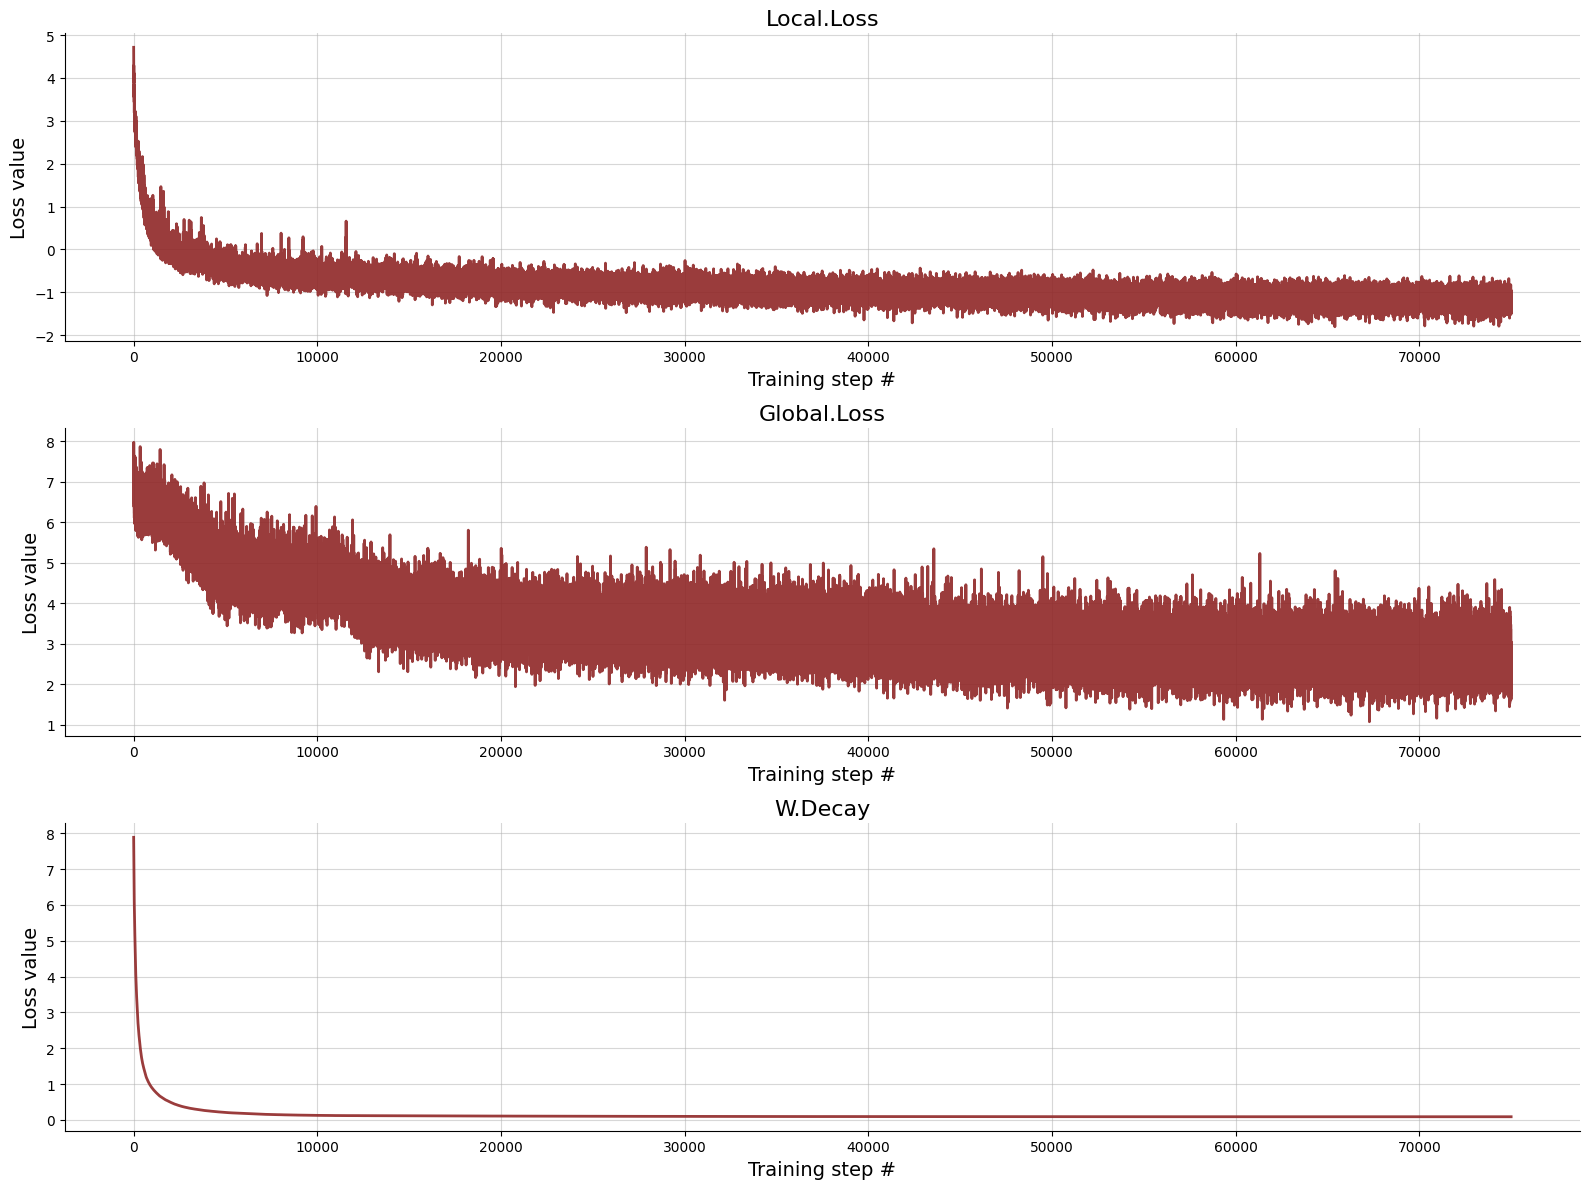

In [7]:
f = beef.diagnostics.plot_losses(mixture_random_walk_history)

In [ ]:
%%time
if TRAIN_LEVY_FLIGHT_DDM:
    levy_flight_history = levy_flight_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    levy_flight_history = levy_flight_experiment.trainer.loss_history.get_plottable()

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
f = beef.diagnostics.plot_losses(levy_flight_history)

In [ ]:
%%time
if TRAIN_REGIME_SWITCHING_DDM:
    regime_switching_history = regime_switching_experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    regime_switching_history = regime_switching_experiment.trainer.loss_history.get_plottable()

In [ ]:
f = beef.diagnostics.plot_losses(regime_switching_history)